## 2.1 Beta distribution

In [19]:
from scipy import special, stats, integrate
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
def beta(a,b,mu):
    return stats.beta.pdf(mu,a,b)

In [50]:
mu_list = np.linspace(0,1,100)
a, b = 8,4

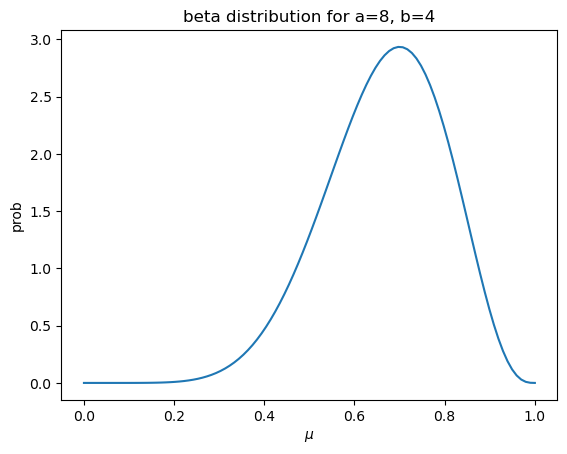

In [52]:

plt.plot(mu_list, beta(a,b,mu_list))
plt.title(f'beta distribution for a={a}, b={b}')
plt.xlabel(r'$\mu$')
plt.ylabel('prob')
plt.show()

In [53]:
numer,_  = integrate.quad(lambda mu: (mu*beta(a,b,mu)),0,1)
denom,_ = integrate.quad(lambda mu: beta(a,b,mu),0,1) 
mean_beta = numer / denom
numer1,_ = integrate.quad(lambda mu: (mu**2) * beta(a,b,mu),0,1)
denom1,_ = integrate.quad(lambda mu: beta(a,b,mu),0,1)
var_beta = numer1 / denom1 - mean_beta**2

print(f"mean_beta:{mean_beta:.3f} | variance_beta:{var_beta:.3f}")

mean_beta:0.667 | variance_beta:0.017


In [115]:
N, mu_ = 50, 0.3
datas_bin = np.random.binomial(N, mu_, 1)
print(datas_bin)
m = N - datas_bin
l = N - m
print("m:",m)

[17]
m: [33]


In [118]:
def likelihood(mu, N, m):
    return mu**m * (1-mu)**(N-m)

def norm_likelihood(mu_,N,m):
    integral ,_  = integrate.quad(lambda mu: (likelihood(mu,N,m)),0,1)
    result = likelihood(mu_,N,m) / integral
    return result

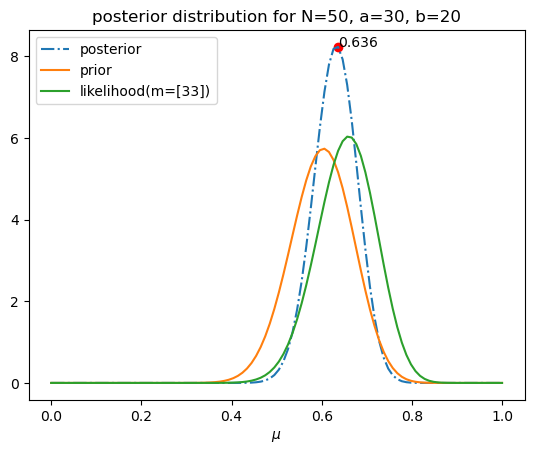

In [126]:

def gamma_fn(a):
    return special.gamma(a)

def post_beta(mu,m,l,a,b):
    result = mu**(m+a-1) * (1-mu)**(l+b-1) * gamma_fn(m+l+a+b) / (gamma_fn(m+a)*gamma_fn(l+b))
    return result

a,b = 30,20
post_dist = [post_beta(mu,m,l,a,b) for mu in mu_list]

plt.plot(mu_list, post_dist,'-.',label='posterior',)
plt.scatter(mu_list[np.argmax(post_dist)],post_dist[np.argmax(post_dist)], color='red')
plt.annotate(f'{mu_list[np.argmax(post_dist)]:.3f}',(mu_list[np.argmax(post_dist)],post_dist[np.argmax(post_dist)]) )
plt.plot(mu_list, beta(a,b, mu_list), label='prior')
#plt.annotate(f'{mu_list[np.argmax(post_dist)]:.3f}',(mu_list[np.argmax(post_dist)],post_dist[np.argmax(post_dist)]) )

plt.plot(mu_list, norm_likelihood(mu_list,N,m), label=f'likelihood(m={m})')
plt.legend()
plt.title(f"posterior distribution for N={N}, a={a}, b={b}")
plt.xlabel(r'$\mu$')
plt.show()